#✅ Sempre assumindo que a hipótese nula (H₀) é verdadeira.

Durante um teste de hipótese, a distribuição que visualizamos é sempre construída assumindo que a hipótese nula (H₀) é verdadeira.

Porque o teste de hipótese é como um julgamento, e a hipótese nula é a "inocência presumida".

A curva da distribuição amostral sob H₀ mostra:

* Quais valores são esperados apenas por erro amostral;
* E quais valores são improváveis se H₀ for verdadeira (regiões críticas).

⚖️ Analogia com tribunal:
* H₀ = "O réu é inocente"
* Ha = "O réu é culpado"
* Estatística de teste = evidência
* Região crítica = além da dúvida razoável

Aqui está o gráfico com as distribuições sob a hipótese nula (H₀) e a hipótese alternativa (H₁):

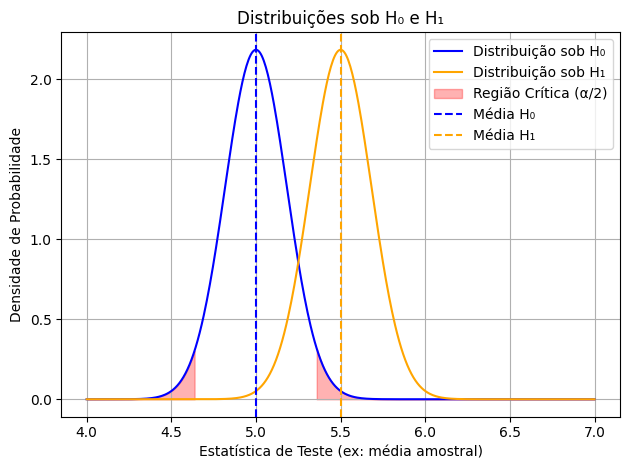

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros
mu_0 = 5      # Média sob H0 (hipótese nula)
mu_1 = 5.5    # Média sob H1 (hipótese alternativa)
sigma = 1     # Desvio padrão
n = 30        # Tamanho da amostra
alpha = 0.05  # Nível de significância (5%)

# Erro padrão
se = sigma / np.sqrt(n)

# Intervalo para x
x = np.linspace(4, 7, 500)

# Densidades das distribuições sob H0 e H1
y0 = norm.pdf(x, mu_0, se)
y1 = norm.pdf(x, mu_1, se)

# Limites da região crítica (teste bicaudal)
z_crit = norm.ppf(1 - alpha/2)
lim_inf = mu_0 - z_crit * se
lim_sup = mu_0 + z_crit * se

# Plotando as distribuições
plt.plot(x, y0, label='Distribuição sob H₀', color='blue')
plt.plot(x, y1, label='Distribuição sob H₁', color='orange')

# Sombreando regiões críticas sob H0
plt.fill_between(x, 0, y0, where=(x < lim_inf), color='red', alpha=0.3, label='Região Crítica (α/2)')
plt.fill_between(x, 0, y0, where=(x > lim_sup), color='red', alpha=0.3)

# Marcas visuais
plt.axvline(mu_0, color='blue', linestyle='--', label='Média H₀')
plt.axvline(mu_1, color='orange', linestyle='--', label='Média H₁')

# Configurações do gráfico
plt.title('Distribuições sob H₀ e H₁')
plt.xlabel('Estatística de Teste (ex: média amostral)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


✳️ Interpretação:
* Curva azul: representa a distribuição da média amostral assumindo que H₀ é verdadeira (média populacional = 5).
* Curva laranja: mostra a distribuição se H₁ for verdadeira (média populacional = 5.5).

Regiões vermelhas sombreadas: são as regiões críticas de um teste bicaudal com α = 0.05. Se a média amostral cair nessas regiões, rejeitamos H₀.

As linhas tracejadas mostram as médias de H₀ e H₁.

✅ Sim, sempre estamos olhando para a distribuição de H₀ quando calculamos o p-valor ou estabelecemos regiões críticas. A lógica é: “se H₀ fosse verdadeira, quão provável seria obter o resultado que observamos?” Se essa probabilidade for muito baixa (menor que α), rejeitamos H₀. ​

#🧪 Testes de Hipótese: Bicaudais e Unicaudais

Antes de aprofundar nos tipos de teste, precisamos entender a hipótese nula (H₀) e a hipótese alternativa (Hₐ):

Hipótese nula (H₀): É a suposição de que não há diferença ou efeito. Por exemplo, "o novo medicamento não altera a pressão arterial média dos pacientes".

Hipótese alternativa (Hₐ): É a afirmação que queremos testar. Pode assumir três formas:

* Hₐ: μ ≠ μ₀ (diferença bilateral – bicaudal)
* Hₐ: μ > μ₀ (diferença para mais – unicaudal direita)
* Hₐ: μ < μ₀ (diferença para menos – unicaudal esquerda)

#🔁 Teste Bicaudal (Hₐ: μ ≠ μ₀)

Esse teste verifica se há diferença, para mais ou para menos. Ele é usado quando não temos preferência pela direção da diferença.

📍 Exemplo em Saúde:

Um hospital afirma que o tempo médio de recuperação pós-operatória é de 5 dias. Uma nova técnica cirúrgica foi testada. Queremos saber se ela altera esse tempo de recuperação — seja para menos ou para mais.

* H₀: μ = 5 dias
* Hₐ: μ ≠ 5 dias

Neste caso, a curva de distribuição é dividida em duas regiões críticas (uma em cada cauda). Se a média amostral cair em uma dessas regiões, rejeitamos H₀.

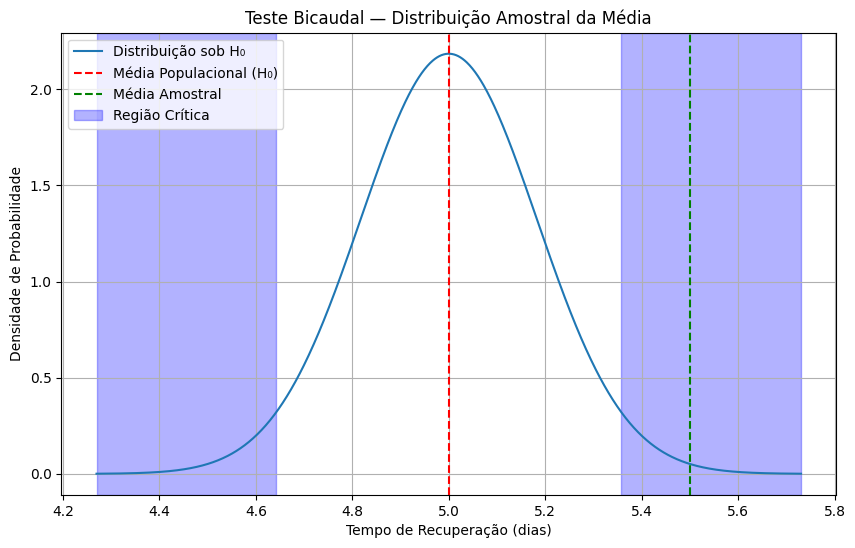

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (substitua pelos seus dados reais)
media_amostral = 5.5  # Exemplo: média amostral obtida
media_populacional = 5
desvio_padrao = 1
n = 30  # Tamanho da amostra

# Calcular o erro padrão
erro_padrao = desvio_padrao / np.sqrt(n)

# Criar a distribuição normal da média amostral (não da população inteira)
x = np.linspace(media_populacional - 4 * erro_padrao, media_populacional + 4 * erro_padrao, 1000)
y = (1 / (erro_padrao * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media_populacional) / erro_padrao) ** 2)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição sob H₀')

# Marcar a média populacional
plt.axvline(x=media_populacional, color='red', linestyle='dashed', linewidth=1.5, label='Média Populacional (H₀)')

# Marcar a média amostral
plt.axvline(x=media_amostral, color='green', linestyle='dashed', linewidth=1.5, label='Média Amostral')

# Regiões críticas (bicaudal)
limite_inferior = media_populacional - 1.96 * erro_padrao
limite_superior = media_populacional + 1.96 * erro_padrao

plt.axvspan(xmin=x[0], xmax=limite_inferior, alpha=0.3, color='blue', label='Região Crítica')
plt.axvspan(xmin=limite_superior, xmax=x[-1], alpha=0.3, color='blue')

# Adicionar detalhes ao gráfico
plt.title('Teste Bicaudal — Distribuição Amostral da Média')
plt.xlabel('Tempo de Recuperação (dias)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


🧪 Interpretação do Gráfico:

Curva Laranja: Distribuição amostral da média sob a suposição de que a hipótese nula (H₀) é verdadeira — ou seja, que a média populacional é 5 dias de recuperação.

* Linha Vermelha Tracejada: Média populacional sob H₀.
* Linha Verde Tracejada: Média amostral observada (5.5 dias).

Faixas Azuis Sombreadas: Regiões críticas (5% do total — 2.5% em cada cauda). Se a média amostral cair nessa região, rejeitamos H₀ ao nível de significância de 0.05.

Como a média amostral observada está fora da região crítica, não rejeitaríamos H₀ nesse exemplo (a não ser que o ponto verde caísse dentro da área azul).

#👉 Teste Unicaudal à Direita (Hₐ: μ > μ₀)

Usado quando esperamos que o efeito ocorra acima de um valor de referência.

📍 Exemplo em Saúde:

Uma equipe médica afirma que um novo suplemento alimentar aumenta o nível médio de hemoglobina dos pacientes.

* H₀: μ ≤ 13 g/dL
* Hₐ: μ > 13 g/dL

Se a média da amostra for significativamente maior que 13 g/dL e cair na região crítica à direita, rejeitamos H₀.



#👈 Teste Unicaudal à Esquerda (Hₐ: μ < μ₀)

Usado quando esperamos que o efeito ocorra abaixo de um valor de referência.

📍 Exemplo em Saúde:

Após uma intervenção para reduzir o colesterol LDL, queremos verificar se o nível médio caiu abaixo de 130 mg/dL.

* H₀: μ ≥ 130 mg/dL
* Hₐ: μ < 130 mg/dL

Se a média amostral estiver significativamente abaixo de 130 mg/dL e cair na cauda esquerda, rejeitamos H₀.

#✅ Decisão prévia e validade da análise

"Você deve sempre decidir se usará uma probabilidade unicaudal ou bicaudal antes de analisar os dados."

 Essa recomendação é fundamental para evitar o chamado p-hacking, ou seja, ajustar a análise após ver os resultados para obter significância. Definir o tipo de teste antes protege a validade científica da conclusão.

#🔄 Unicaudal vs. Bicaudal na prática científica

"Testes bicaudais são muito mais comuns do que testes unicaudais em pesquisas científicas..."

Isso acontece porque a ciência, por princípio, deve estar aberta a resultados em qualquer direção. Testes bicaudais são mais conservadores e refletem a ideia de que uma diferença significativa em qualquer sentido é relevante para investigação.

#🎯 Uso justificado do teste unicaudal

"Testes unicaudais são apropriados quando não é importante distinguir entre nenhum efeito e um efeito na direção inesperada."

Testes unicaudais são apropriados quando não é importante distinguir entre nenhum efeito e um efeito na direção inesperada. Por exemplo, considere um experimento projetado para testar a eficácia de um tratamento para resfriado comum. O pesquisador estaria interessado apenas em saber se o tratamento foi melhor do que um controle placebo. Não valeria a pena distinguir entre o caso em que o tratamento foi pior do que um placebo e o caso em que foi o mesmo, porque em ambos os casos o medicamento seria inútil.

#⚠️ O risco de restringir a análise com base em previsões

"O problema com esse argumento é que, se o efeito se manifesta fortemente na direção não prevista..."

 Aqui está o perigo real dos testes unicaudais: cegar-se para efeitos que não são os esperados. Isso pode levar a falsas negativas, especialmente se os dados mostram algo relevante na direção oposta. Por isso, a comunidade científica é cética quanto ao uso de testes unicaudais, a não ser que haja justificativas muito claras e pré-registradas.

O uso de testes unicaudais pode ser válido, mas deve ser explicitamente justificado e pré-definido no protocolo do estudo. Do contrário, corre-se o risco de comprometer a integridade estatística da análise e diminuir a confiança nos resultados.